# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

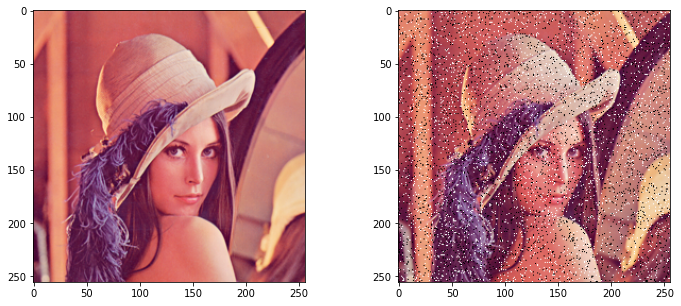

In [22]:
lena = cv2.imread("lenaRGB.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

lena_noise = cv2.imread("lenaRGBSzum.png")
lena_noise = cv2.cvtColor(lena_noise, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.imshow(lena)
ax2.imshow(lena_noise)

In [79]:
from sklearn.metrics import pairwise

def find_median(window):
    if window.ndim ==3:
        stacked_window = np.vstack(window)
        dist = pairwise.euclidean_distances(stacked_window)
        median_index = dist.sum(axis=0).argmin()
    else:
        w = window.flatten()
        median_index = np.argpartition(w, len(w) // 2)[len(w) // 2] 
    
    return np.unravel_index(median_index, window.shape[:2])

def median_filter(img, w=3):
    idx = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = img[i:i+w, j:j+w].copy()
            
            median_index = find_median(window)
            idx.append( [i + median_index[0], j + median_index[1]] )
    
    idx_i, idx_j = np.array(idx).T
            
    return img[idx_i, idx_j].reshape(img.shape)
            
            

In [84]:
# troche sie liczy
lena_denoised_3 = median_filter(lena_noise, w=3)
lena_denoised_7 = median_filter(lena_noise, w=7)

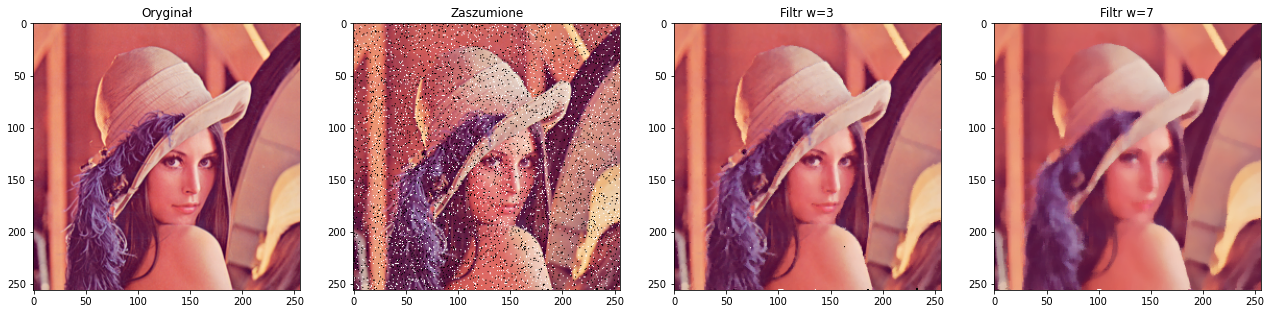

In [90]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(22,7))
ax1.imshow(lena)
ax1.set_title("Oryginał")
ax2.imshow(lena_noise)
ax2.set_title("Zaszumione")
ax3.imshow(lena_denoised_3)
ax3.set_title("Filtr w=3")
ax4.imshow(lena_denoised_7)
ax4.set_title("Filtr w=7")
plt.show()